# Environment setting
It is recommended to use Conda environment to install needed packages and run these codes, please refer to the following URL for details:
https://wiki.powerplant.pfr.co.nz/en/programming/anaconda    
don't forget kernal command:  
conda install ipython ipykernel  
python -m ipykernel install --user --name "hraxxx_project" --display-name "hraxxx_project"

Atfter conda environment settle,install needed package(if this kernal cannot work after install some spcific package(chromosight),run kernal command above again):    

instll needed package:  
conda install numpy  
conda install pandas  
conda install -c bioconda chromosight  
conda install -c bioconda cooler  
conda install -c anaconda scikit-image  
conda install -c conda-forge tqdm  
conda install -c anaconda idna  

Otherwise,python 3.7.7 also work, but cannot use cmd in terminal  
directly input code below in notebook rather than terminal:  
pip3 install --user chromosight  
pip install hic2cool  
pip install scikit-image  
(not suggest)



In [ ]:
import chro_use as cu

In [4]:
print(1)

1


In [5]:
import chro_use as cu

In [6]:
#import all needed package
import chro_use as cu
import chro_tools as ct
import column as co
import contig as cg
%config InlineBackend.figure_format = 'svg'
import re
import json
import numpy as np
import pandas as pd
import cooler
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import chromosight.utils.contacts_map as mapp
from IPython.display import display
import chromosight.utils.io as io
%matplotlib inline
from scipy.signal import find_peaks
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage.transform import resize
from skimage import data, img_as_float
import cv2
from operator import itemgetter
from findpeaks import findpeaks
from scipy import signal
from hic2cool import hic2cool_convert
import networkx as nx

In [ ]:
import contig as cg

In [ ]:
print(1)

# Function for Chro_use

In [ ]:
#transfer .hic file to .mcool file
#parameter:
#infile:.hic file path
#out file:.mcool file path,will generate .mcool file
#other details please see https://github.com/4dn-dcic/hic2cool
hic2cool_convert(<infile>, <outfile>, <resolution (optional)>, <nproc (optional)>, <warnings (optional)>, <silent (optional)>)

In [7]:
# call chro_use.heatmap_anylsis class
#parameter : 
#path: path for .cool file, if file type is mcool,need to add ::/resolutions/<resolution value>
# resolutions value can only choose from{1000,5000,10000,25000,50000,100000,250000,500000,1000000,2500000}
#smaller resolution value will have more details in matrix and image
fish = cu.heatmap_anylsis("HH_HiC200M.contact_map.mcool::/resolutions/100000")

In [8]:
#will return cooler.api.cooler,could get informations about .cool file use fish_cool.info
#other cooler.cooler information please see:
#https://cooler.readthedocs.io/en/latest/api.html#cooler.Cooler
fish_cool = fish.readcool()

In [9]:
# will return heatmap matrix from .cool file
#parameter:
#value:could choose form (Flase,True,'KR','VC','SQRT_VC'),
#represent normalization method,default is False
#False means don't do any normalization,True represent use weight column do selection
#The rest three represent three different normalization ways.
#note some .cool file don't have weight column, use ‘cooler balance [OPTIONS] COOL_PATH’ in PuTTy(terminal)
# calculate weight column and then set value = True
#detail please see:
#https://cooler.readthedocs.io/en/latest/cli.html#cooler-balance
#https://cooler.readthedocs.io/en/latest/api.html
#https://github.com/igvteam/juicebox.js/issues/65
#https://gcmapexplorer.readthedocs.io/en/latest/cmapNormalization.html#id6
big_mat = fish.getmatrix(value = False)

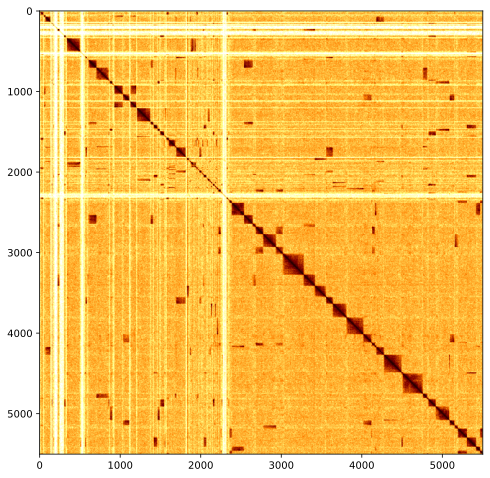

In [10]:
#generate image(work for either map or contig_row)
#parameter:
#matrix : the 2D Array(matrix) of the image that you want to generate
#size: image size , default = (8,8)
fish.generatemap(matrix = big_mat,size = (8,8))

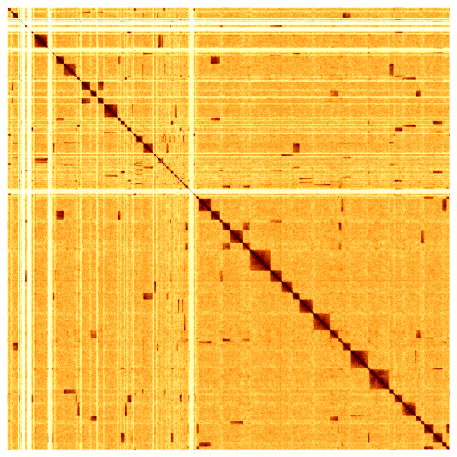

In [11]:
# Same function as fish.generatemap,only difference is it will resize tiny contig row from 
# unvisible to visible and remove axis
fish.generatemap2(big_mat,size = (8,8))

In [12]:
# will return pandas.dataframe include all informations about bins,include normalization column
bin_info = fish.bins_info()
bin_info

chrom   start     end        KR     SCALE        VC  \
0         contig_1_pilon_pilon       0  100000  1.188592  1.189410  1.519982   
1         contig_1_pilon_pilon  100000  149114  0.769322  0.768794  0.651906   
2        contig_10_pilon_pilon       0    2606       NaN       NaN       NaN   
3      contig_1000_pilon_pilon       0  100000  1.000000  1.000000  1.000000   
4      contig_1000_pilon_pilon  100000  100064       NaN       NaN  0.000000   
...                        ...     ...     ...       ...       ...       ...   
5498  scaffold_976_pilon_pilon  200000  300000  1.079740  1.080030  1.233311   
5499  scaffold_976_pilon_pilon  300000  400000  1.039817  1.040073  1.146005   
5500  scaffold_976_pilon_pilon  400000  500000  1.059112  1.059397  1.187360   
5501  scaffold_976_pilon_pilon  500000  600000  1.063484  1.063565  1.192874   
5502  scaffold_976_pilon_pilon  600000  646342  0.639171  0.638467  0.438368   

       VC_SQRT    weight  
0     1.181676  0.024103  
1     0.773877       NaN  
2          NaN       NaN  
3     1.000000  0.035163  
4     0.000000       NaN  
...        ...       ...  
5498  1.078412  0.031305  
5499  1.039541  0.033138  
5500  1.058131  0.035395  
5501  1.060585  0.039821  
5502  0.642936       NaN  

[5503 rows x 8 columns]

In [13]:
#dataframe that include all information about contigs,include length,start and end bin, very 
#important, will be input as parameter with lots of functions
info = fish.chro_info()
info

name    length  start_bin  end_bin
0        contig_1_pilon_pilon    149114          0        2
1       contig_10_pilon_pilon      2606          2        3
2     contig_1000_pilon_pilon    100064          3        5
3     contig_1004_pilon_pilon      1806          5        6
4     contig_1005_pilon_pilon      1677          6        7
..                        ...       ...        ...      ...
561  scaffold_779_pilon_pilon  11052189       5186     5297
562  scaffold_780_pilon_pilon  11210716       5297     5410
563  scaffold_796_pilon_pilon   5020744       5410     5461
564  scaffold_818_pilon_pilon   3485666       5461     5496
565  scaffold_976_pilon_pilon    646342       5496     5503

[566 rows x 4 columns]

In [14]:
# will thansfer start_bin and end_bin dolumn from dataframe to list
#parameter:
#list_type:choose from 'start_list' and “end_list"
start = fish.thansfer_bin_to_list(list_type='start_list')
end = fish.thansfer_bin_to_list(list_type='end_list')

In [23]:
len(start)

566

In [15]:
# will split big matrix by each contig row,generate same amount image as number of contigs
#parameter:
#rtype: choose from 'list' and 'dic',list will return splitted matrix list,dic will return
# a dictionary,dictionary key = contig id and value = splitted matrix,recomaand use 'dic'
all_list = fish.split_matrix(rtype = 'list')
all_dic = fish.split_matrix(rtype = 'dic')

In [16]:
#remove array could remove array from a list
#parameter:
#List:the list that you want to reomove something
#arr: the array which you wanna to remove
matrix = all_dic.get('scaffold_796_pilon_pilon')
fish.removearray(List = all_list,arr = matrix)

In [17]:
#get contig id according 2D matrix
#parameter:
#matrix:2D array(matrix) that you want to know contig id
#my_dict:dictionary that key = contig id and value = contig matrix,generated use heatmap_anylsis.split_matrix('dic')
contig_id = fish.get_contig_id(matrix = matrix,my_dict = all_dic)
contig_id

'scaffold_796_pilon_pilon'

In [18]:
#sort matrix according contig width,will return a list with matrix from small to large
sorted_matrix = fish.sort_matrix()

In [19]:
#remove all contig rows which shorter than length,will return a list which contains all contig that longer than length
#parameter:
#length:will reomove contig rows shorter than that value
g500000 = fish.remove_contig_length(length = 500000)

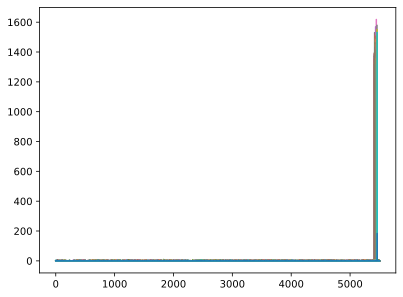

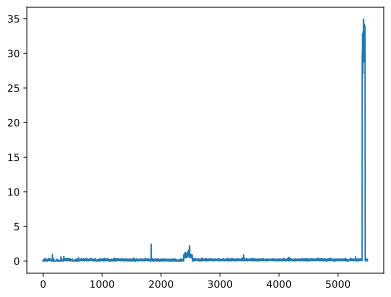

In [20]:
#will generate plot graph about that matrix
#parameter:
#contig_matrix:2D matrix represent a contig orw
fish.peak_dia(contig_matrix= matrix)
#note:not suggest,suggest use other peak_plot function in chro_tools module,if you wanna to see specfic
#contig row graph,please directly use:
plt.plot(np.mean(matrix,axis = 0))


In [21]:
#find contig id by input specfic x-axis or y-axis index
#parameter:
#p_index:x or y -axis index that you are intersted
#dic : all_dic,dictionary contaion all contig rows information,key = contig id ,value = 2D matrix,
#generate by split_matrix('dic')
#matrix: whole heatmap big matrix,get from getmatrix()
#chro_frame:pandas dataframe contain contig information,generate by chro_info()
fish.find_location(p_index = 500,dic = all_dic,matrix = big_mat,choro_frame = info)

'contig_137_pilon_pilon'

# Column

In [18]:
#call column.column class
#parameter:
#chro_info: dataframe include contig information,genereate by chro_use.heatmap_anylsis.chro_info()
#splited_matrix:List that contain contig rows matrix
fish_co = co.column(chro_info = info,splited_matrix = g500000)

In [19]:
# function to smooth 1D array
#parameter:
#scaffold: the 1D sequence that you wanna to smmoth,tranfer 2D to 1D 
#by calculate column mean please use np.mean(<2D array>,axis = 0 )
#window_length:smooth kernal,default 10
fish_co.smooth_scaffold(scaffold = np.mean(matrix,axis = 0),window_length = 10)

array([0.03448276, 0.03448276, 0.03448276, ..., 0.90689655, 0.87586207,
       0.67241379])

In [20]:
# function to detect specfic contig peak by column mean,and return a dictionary with key = contig id that 
#you want to detect,value = the detected peak contig id
#parameter:
#matrix: the 2D matrix of contig that you wanna to detect peak
#big_matrix: 2D matrix for whole heatmap
#all_dic:dictionary with key = contig id,value = 2d matrix
#choro_frame = dataframe that contain all contig information
#s_distance:Required minimal horizontal distance (>= 1) in samples between neighbouring peaks. 
#smaller peaks are removed first until the condition is fulfilled for all remaining peaks.default = 110
#mode: choose from None and 'filter',if chhose filter, if function detect a contig peak,but this contig
#shorter than f_value,remove it.default = None
#value: threshold value, threshold = median * value,default = 4
#f_value: filter value,only work if mode = 'filter',filter all contig peak which shorter than f_value,default = 500000
new_dict = fish_co.get_ids(matrix = matrix,big_matrix = big_mat,all_dic = all_dic,choro_frame = info,s_distance = 110)
new_dict1 = fish_co.get_ids(matrix = matrix,big_matrix = big_mat,all_dic = all_dic,choro_frame = info,s_distance = 110,mode = 'filter',value = 4,f_value = 800000)
print(new_dict)
print(new_dict1)

{'contig_569_pilon_pilon': {'contig_1022_pilon_pilon', 'contig_978_pilon_pilon', 'scaffold_976_pilon_pilon', 'contig_686_pilon_pilon', 'contig_569_pilon_pilon'}}
{'contig_569_pilon_pilon': {'contig_978_pilon_pilon', 'contig_1022_pilon_pilon', 'contig_569_pilon_pilon'}}


In [28]:
# function to detect all of contigs peak in the splited matrix(g500000),will return dictionary
# with key = detected contig id,value = contig peak id of detected contig row
#big_mat: 2D matrix for whole heatmap
#all_dic:dictionary with key = contig id,value = 2d matrix
#info = dataframe that contain all contig information
#the rest {s_distance,mode,value,f_value} are same as column.column.get_ids()
new_dict2 = fish_co.get_ids_dict(big_mat = big_mat,info = info,all_dic = all_dic,s_distance = 110)
new_dict3 = fish_co.get_ids_dict(big_mat = big_mat,info = info,all_dic = all_dic,s_distance = 110,mode = 'filter',f_value = 500000)

In [ ]:
#function to evaluation peak detection method(column),for example: if contig 1 detect contig2,and contig2 also 
#detect contig1,score will +1
#parameter:
#dic:the dictinary with key = contig id that you wanna detect,value = detected contig peak id
#generate by fish_co.get_ids_dict
#the rest parameter same as before
#noet:please make sure s_distance,mode,value,f_value set as same as the dictionary which you want to evaluate
fish_co.get_score_column(big_mat = big_mat,dic = new_dict2,all_dic = all_dic,s_distance = 110,mode = None,value = 4,f_value = 500000)

In [ ]:
# optimize merthod,for example: if contig 1 detect contig2,and contig2 also detect contig1,
# determine contig1 and 2 have relationship,otherwise(contig1 detect contig2 but contig 2 cannot
#detect contig1) will be remove
#parameter:
#same as fish_co.get_score_column
#noet:please make sure s_distance,mode,value,f_value set as same as the dictionary which you want to optmize
new_dict4 = fish_co.optimize_result(big_mat = big_mat,dic = new_dict2,all_dic = all_dic,info = info,s_distance = 110,mode = None,value = 4,f_value = 500000)

In [ ]:
# function that extract contig start and end bin or length information
#parameter:
#contig: 2D matrix for specfic contig row
#all_dic:dictionary with key = contig id,value = 2D matrix
#dtype: choose from 'bin' and 'length',bin will return contig start and end bin,length will return contig length
print(fish_co.get_length(contig = matrix,all_dic = all_dic,dtype = 'bin'))
print(fish_co.get_length(contig = matrix,all_dic = all_dic,dtype = 'length'))

# Contig

In [33]:
#call contig.contig class
#parameter:
#chro_info: dataframe include contig information,genereate by chro_use.heatmap_anylsis.chro_info()
#splited_matrix:List that contain contig rows matrix
fish_ct = cg.contig(chro_info = info,splitted_matrix = g500000)

In [34]:
# function to detect specfic contig peak by contig matrix mean,and return a dictionary with key = contig id that 
#you want to detect,value = the detected peak contig id
#parameter:
#matrix: the 2D matrix of contig that you wanna to detect peak
#all_dic:dictionary with key = contig id,value = 2d matrix
#mode: choose from None, 'smooth' and 'filter',if choose filter:if function detect a contig peak,but this contig
#shorter than f_value,remove it.default = None,if choose 'smooth',will gaussian smooth matrix before calculate mean
#value: threshold value, threshold = mean * value,default = 4
#f_value: filter value,only work if mode = 'filter',filter all contig peak which shorter than f_value,default = 500000
new_dict5 = fish_ct.find_ids_contig(all_dic = all_dic,matrix = matrix,mode = None,value = 4,f_value = 500000)
new_dict5 

{'scaffold_796_pilon_pilon': {'contig_1333_pilon_pilon',
  'contig_1551_pilon_pilon',
  'scaffold_1181_pilon_pilon',
  'scaffold_796_pilon_pilon'}}

In [35]:
# function to detect all of contigs peak in the splited matrix(g500000),will return dictionary
# with key = detected contig id,value = contig peak id of detected contig row
#all_dic:dictionary with key = contig id,value = 2d matrix
#the rest {s_distance,mode,value,f_value} are same as contig.contig.find_ids_contig()
new_dict6 = fish_ct.sort_by_contig(all_dic = all_dic,mode = None, value = 3,f_value = 500000)

In [36]:
new_dict8 = fish_ct.sort_by_contig(all_dic = all_dic,mode = 'filter', value = 3,f_value = 500000)

In [ ]:
##function to evaluation peak detection method(contig),for example: if contig 1 detect contig2,and contig2 also 
#detect contig1,score will +1
#parameter:
#dic:the dictinary with key = contig id that you wanna detect,value = detected contig peak id
#generate by fish_ct.sort_by_contig
#the rest parameter same as before
#noet:please make sure s_distance,mode,value,f_value set as same as the dictionary which you want to evaluate
fish_ct.get_score_contig(dic = new_dict6,all_dic = all_dic,mode = None,value = 3,f_value = 500000)

In [23]:
# optimize merthod,for example: if contig 1 detect contig2,and contig2 also detect contig1,
# determine contig1 and 2 have relationship,otherwise(contig1 detect contig2 but contig 2 cannot
#detect contig1) will be remove
#parameter:
#same as fish_co.get_score_column
#noet:please make sure s_distance,mode,value,f_value set as same as the dictionary which you want to optmize
#also,optimize contig please use contig.contig.optimize_result(fish_ct.optimize_result),
#optimize column please use column.column.optimize_result(fish_co.optimize_result)
new_dict7 = fish_ct.optimize_result(dic = new_dict6,all_dic=all_dic,mode = None,value = 4,f_value = 500000)

# Chro_tools  
this module include some non_related tool function,hence haven't merge in a class


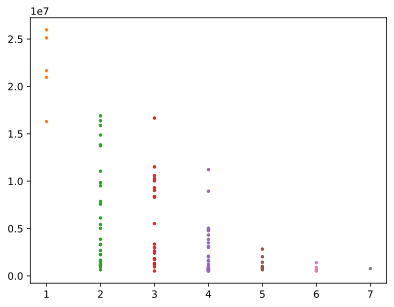

In [22]:
#function to generate scatter plot,x_axis represent number of peaks been detected,y_axis represent 
#contig peak length
#parameter:
#dic:the dictinary with key = contig id that you wanna detect,value = detected contig peak id
#all_dic:dictionary with key = contig id,value = 2d matrix
#info:dataframe that contain contigs information
ct.l_n_scatter(dic=new_dict2,all_dic = all_dic,info = info)

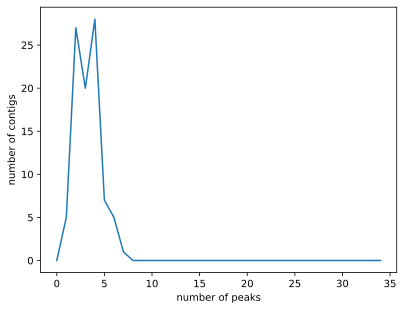

{0: 0,
 1: 5,
 2: 27,
 3: 20,
 4: 28,
 5: 7,
 6: 5,
 7: 1,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0}

In [23]:
#generate peak graph,x-axis = number of peaks and y-axis represent number of contigs been detected
#paramter:
#dic:the dictinary with key = contig id that you wanna detect,value = detected contig peak id
ct.peak_plot(new_dict2)

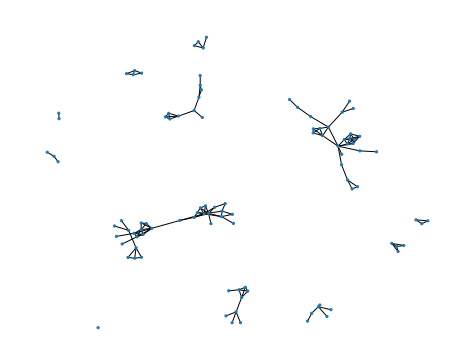

In [24]:
# generate network graph to see peak detection result distribution
#parameter:
#dic:the dictinary with key = contig id that you wanna detect,value = detected contig peak id
#label: choose from True and False, True will show graph with contig id,Flase will not show,default = False
#font_size:only work when label = True, contig id font size,default = 5
ct.net_graph(dic = new_dict2,label = False,font_size = 5)

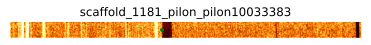

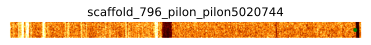

In [26]:
#generate contig row graph and plot the peak,title represent contig id for input matrix,
#detected contig peak id and length
#matrix:2D matrix represent contig which you wanna detect
#dic:the dictinary with key = contig id that you wanna detect,value = detected contig peak id
#all_dic:dictionary with key = contig id,value = 2d matrix
#info:dataframe that contain contigs information
ct.generate_contig_peak(matrix = matrix,dic = new_dict2,chro_info=info,all_dic=all_dic)

scaffold_1181_pilon_pilon
scaffold_796_pilon_pilon


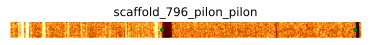

In [27]:
#same as ct.generate_contig_peak,only difference is it will plot peaks in same contig row graph,
#and title represent contig id for input matrix
ct.generate_contig_peak_m(matrix = matrix,dic = new_dict2,chro_info=info,all_dic=all_dic)

In [38]:
#print all contig rows and show peak plot for specific dictionary
#wanna generate graph form different dictionay only need to change new_dict2 to other dictionary
for key,values in new_dict2.items():
    ct.generate_contig_peak_m(matrix = all_dic.get(key),dic = new_dict2,chro_info=info,all_dic=all_dic)

In [37]:
#optimize method only work for dictinary that after filter,and the f_value when you generate dictionary
# must as same as the value that you filter contig row(for example,g500000 filter all contig 
#shorter than 500000,hence f_value must equal to 500000)
#this function will output exactly same result as 
#fish_co.optimize_result(dic = new_dict3,all_dic=all_dic,mode = 'filter',value = 4,f_value = 500000)
# or fish_cot.optimize_result(dic = new_dict8,all_dic=all_dic,mode = 'filter',value = 4,f_value = 500000)
# benifit is this function is much faster than that one,and work for both contig and column,
#but as mentioned ,have some restrict
ct.optimize_result_af(dic = new_dict3)
ct.optimize_result_af(dic = new_dict8)

contig_406_pilon_pilon
contig_1063_pilon_pilon
contig_337_pilon_pilon


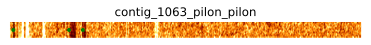

In [49]:
ct.generate_contig_peak_m(matrix =all_dic.get('contig_1063_pilon_pilon'),dic = new_dict2,chro_info=info,all_dic=all_dic)

contig_406_pilon_pilon
contig_1063_pilon_pilon
contig_337_pilon_pilon


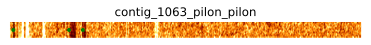

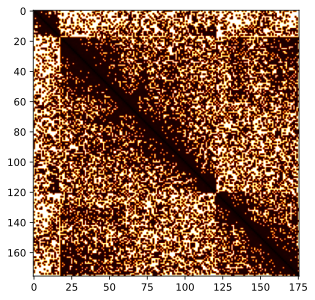

In [50]:
#function to combine several detected peaks form a contig row
#for example: from peak_detection(new_dict2),we know for contig_1063,detected three peaks,which 
#correspind contig 1063, contig 406 ,contig337, this function extract these three contig region and
#concatenate them
#parameter:
#id_list:a list contain several contig ids
##all_dic:dictionary with key = contig id,value = 2d matrix
#info:dataframe that contain contigs information
#note: if you wanna change order of these regions,just change contig id order in id_list
ct.generate_contig_peak_m(matrix =all_dic.get('contig_1063_pilon_pilon'),dic = new_dict2,chro_info=info,all_dic=all_dic)
id_list = ['contig_1063_pilon_pilon','contig_337_pilon_pilon','contig_406_pilon_pilon']
ct.merge_contig(id_list = id_list,info = info,all_dic = all_dic)

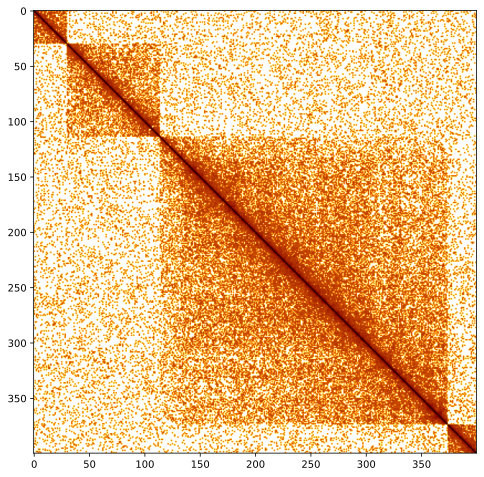

In [24]:
#some other function,detail please see https://cooler.readthedocs.io/en/latest/concepts.html
#also chromosight have lots of other functions,please see https://chromosight.readthedocs.io/en/latest/
#zoom in specific range in heatmap
mat = fish_cool.matrix(sparse=False, balance=False)[2900:3300,2900:3300]
plt.figure(figsize=(8, 8))
plt.imshow(mat ** 0.2, cmap='afmhot_r',norm=colors.PowerNorm(gamma=0.35))



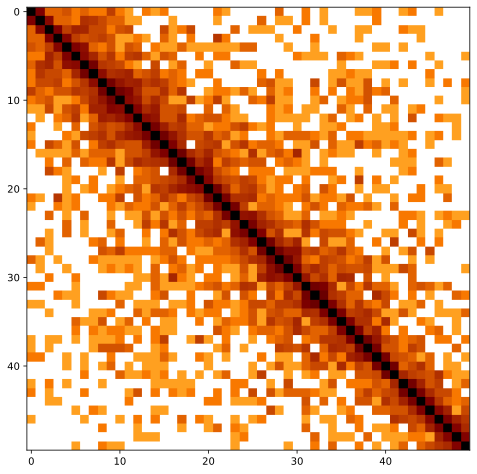

In [25]:
# get image for specific contig
region = 'scaffold_251_pilon_pilon:15000000-20000000'
mat = fish_cool.matrix(sparse=False, balance=False).fetch(region)
plt.figure(figsize=(8, 8))
plt.imshow(np.log10(mat), cmap='afmhot_r',norm=colors.PowerNorm(gamma=0.35))

# Some questions may need to be solve
what's the value meaning in the heatmap_matrix?

In [56]:
fish1 = cu.heatmap_anylsis("HH_HiC200M.contact_map.mcool::/resolutions/100000")
matrix1 = fish.getmatrix()
fish2 = cu.heatmap_anylsis("HH_HiC200M.contact_map.mcool::/resolutions/50000")
matrix2 = fish2.getmatrix()
fish3 = cu.heatmap_anylsis("HH_HiC200M.contact_map.mcool::/resolutions/25000")
matrix3 = fish3.getmatrix()

In [59]:
#from here we can see for three different resolutions, contig_1 include 2/3/6 pixels
print(fish1.chro_info())
print(fish2.chro_info())
print(fish3.chro_info())

                         name    length  start_bin  end_bin
0        contig_1_pilon_pilon    149114          0        2
1       contig_10_pilon_pilon      2606          2        3
2     contig_1000_pilon_pilon    100064          3        5
3     contig_1004_pilon_pilon      1806          5        6
4     contig_1005_pilon_pilon      1677          6        7
..                        ...       ...        ...      ...
561  scaffold_779_pilon_pilon  11052189       5186     5297
562  scaffold_780_pilon_pilon  11210716       5297     5410
563  scaffold_796_pilon_pilon   5020744       5410     5461
564  scaffold_818_pilon_pilon   3485666       5461     5496
565  scaffold_976_pilon_pilon    646342       5496     5503

[566 rows x 4 columns]
                         name    length  start_bin  end_bin
0        contig_1_pilon_pilon    149114          0        3
1       contig_10_pilon_pilon      2606          3        4
2     contig_1000_pilon_pilon    100064          4        7
3     contig_100

In [64]:
#And we calculate sum of contig1 value for three differnt resolutions
a = matrix1[0:2,:]
b = matrix2[0:3,:]
c = matrix3[0:6,:]
total = 0
for i in a:
    for j in i:
        total = total + j
print('100000',' ',total)
total = 0
for i in b:
    for j in i:
        total = total + j
print('50000',' ',total)    
total = 0
for i in c:
    for j in i:
        total = total + j
print('25000',' ',total)

100000   3613
50000   3628
25000   3647


we found sum of contig1 in three different resolutions are roughly same

## Another question
we want to understand how the normalization operations ('KR','VC','SQRT_VC') are performed, the following literature may be helpful.   
https://cooler.readthedocs.io/en/latest/cli.html#cooler-balance  
https://cooler.readthedocs.io/en/latest/api.html  
https://github.com/igvteam/juicebox.js/issues/65  
https://gcmapexplorer.readthedocs.io/en/latest/cmapNormalization.html#id6